In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# import dataset, read from CSV using pandas
ds = pd.read_csv('/content/train.csv')

# see the top row from the dataset
ds.head()

In [ ]:
# identify row x column size
ds.shape

(7907, 9)

In [ ]:
# check country occurences
ds["country"].value_counts().head(10)

United Kingdom    7187
France             153
EIRE               139
Germany            122
Spain               57
Australia           32
Switzerland         31
Belgium             30
Netherlands         29
Norway              17
Name: country, dtype: int64

In [ ]:
# describe brief statistics summary
ds.describe()

,order_id,item_sku,quantity,price_per_unit,user_id,gmv
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,558108.468446,39781.802327,25.709877,5.169617,15243.175035,65.914094
std,10970.037447,24523.371990,836.577544,3.908811,1675.914337,879.764021
min,536367.000000,21137.000000,1.000000,1.040000,12346.000000,1.250000
25%,549977.000000,22423.000000,3.000000,2.080000,13845.500000,13.520000
50%,558351.000000,23298.000000,6.000000,4.950000,15150.000000,20.800000
75%,567373.000000,47566.000000,12.000000,4.950000,16686.000000,42.960000
max,576078.000000,84879.000000,74215.000000,24.960000,18283.000000,77183.600000


In [ ]:
# mapping the correlation matrix
ds.corr()

<ipython-input-41-faa8716cd053>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,order_id,item_sku,quantity,price_per_unit,user_id,gmv
order_id,1.000000,-0.113898,-0.015804,-0.137285,0.015297,-0.022595
item_sku,-0.113898,1.000000,-0.004276,-0.364102,0.038384,-0.012174
quantity,-0.015804,-0.004276,1.000000,-0.020491,-0.022215,0.993359
price_per_unit,-0.137285,-0.364102,-0.020491,1.000000,-0.058996,-0.002693
user_id,0.015297,0.038384,-0.022215,-0.058996,1.000000,-0.024759
gmv,-0.022595,-0.012174,0.993359,-0.002693,-0.024759,1.000000


<ipython-input-42-b400bb96309b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(), annot = True)


<Axes: >

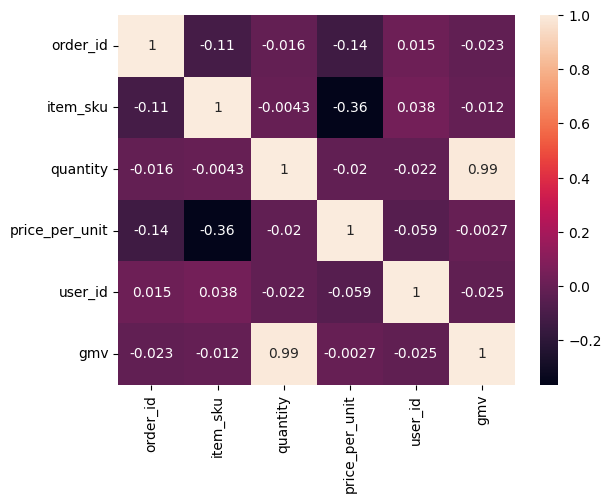

In [ ]:
# project the correlation matrix into a immersive heatmap graph
figsize=(20,10)
sns.heatmap(ds.corr(), annot = True)

In [ ]:
# outlier removal using interquartile range
distance = 1.5 * (np.percentile(ds['gmv'], 75) - np.percentile(ds['gmv'], 25))
ds.drop(ds[ds['gmv'] > distance + np.percentile(ds['gmv'], 75)].index, inplace=True)
ds.drop(ds[ds['gmv'] < np.percentile(ds['gmv'], 25) - distance].index, inplace=True)

In [ ]:
# describe the brief summary after outlier removal
ds.describe()

,order_id,item_sku,quantity,price_per_unit,user_id,gmv
count,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000
mean,558412.067648,40156.845604,7.444963,5.049328,15273.363027,24.410246
std,10857.880889,24698.376993,7.953055,3.893685,1679.778062,17.840127
min,536367.000000,21137.000000,1.000000,1.040000,12347.000000,1.250000
25%,550521.000000,22423.000000,2.000000,2.080000,13869.000000,12.750000
50%,558630.000000,23298.000000,5.000000,4.950000,15159.000000,19.800000
75%,567692.000000,47566.000000,10.000000,4.950000,16729.000000,29.700000
max,576078.000000,84879.000000,48.000000,24.960000,18283.000000,85.920000


In [ ]:
# sort the dataset based on order_date
ds = ds.sort_values(by='order_date', ascending=True)

In [ ]:
# drop the "unnecessary" column for further analysis, only keep the most relevant features
ds = ds.drop(columns = 'order_id', axis = 1)
ds = ds.drop(columns = 'item_sku', axis = 1)
ds = ds.drop(columns = 'user_id', axis = 1)

In [ ]:
# change orderdate data from object to datetime (pandas readable)
ds['order_date'] = pd.to_datetime(ds['order_date'])

# resample the data so it will clustered based on weekly summation
ds = ds.resample('W', on='order_date').sum()

# eliminate all the zero value after resample
ds = ds[ds['quantity'] != 0]

# change index data type to weekly time format
ds.index = pd.DatetimeIndex(ds.index)

<ipython-input-47-f17c41449c61>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ds = ds.resample('W', on='order_date').sum()


In [ ]:
# display the newly formed dataset
display(ds)

,quantity,price_per_unit,gmv
order_date,,,
2010-12-05,782,617.96,2459.72
2010-12-12,1047,811.23,3779.71
2010-12-19,899,567.00,2865.41
2010-12-26,125,204.92,748.85
2011-01-09,627,366.84,1936.61
2011-01-16,494,373.70,1675.30
2011-01-23,296,285.70,1072.62
2011-01-30,517,457.61,1884.59
2011-02-06,580,455.47,1966.14


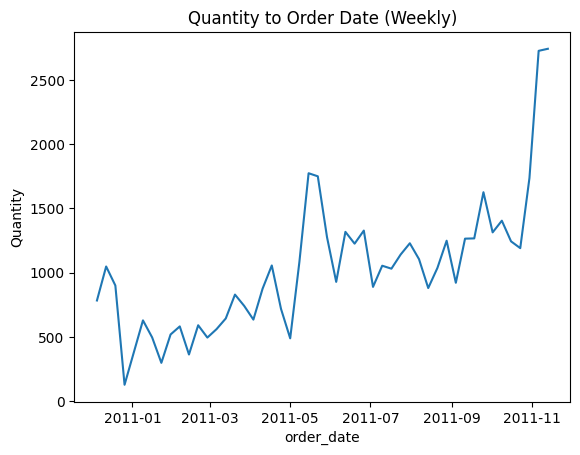

In [ ]:
# visualizing quantity over order_date
sns.lineplot(x=ds.index, y='quantity', data=ds)
plt.ylabel('Quantity')
plt.title('Quantity to Order Date (Weekly)')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

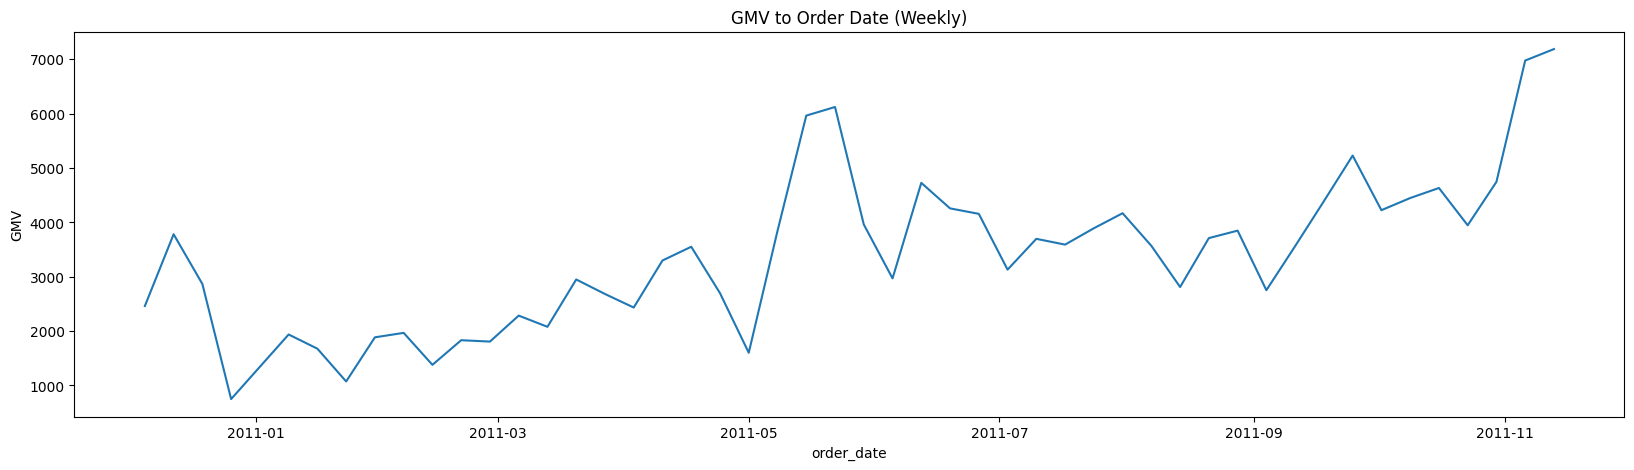

In [ ]:
# visualizing gmv over order_date
sns.lineplot(x=ds.index, y='gmv', data=ds)
plt.ylabel('GMV')
plt.title('GMV to Order Date (Weekly)')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize

import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook
from itertools import product

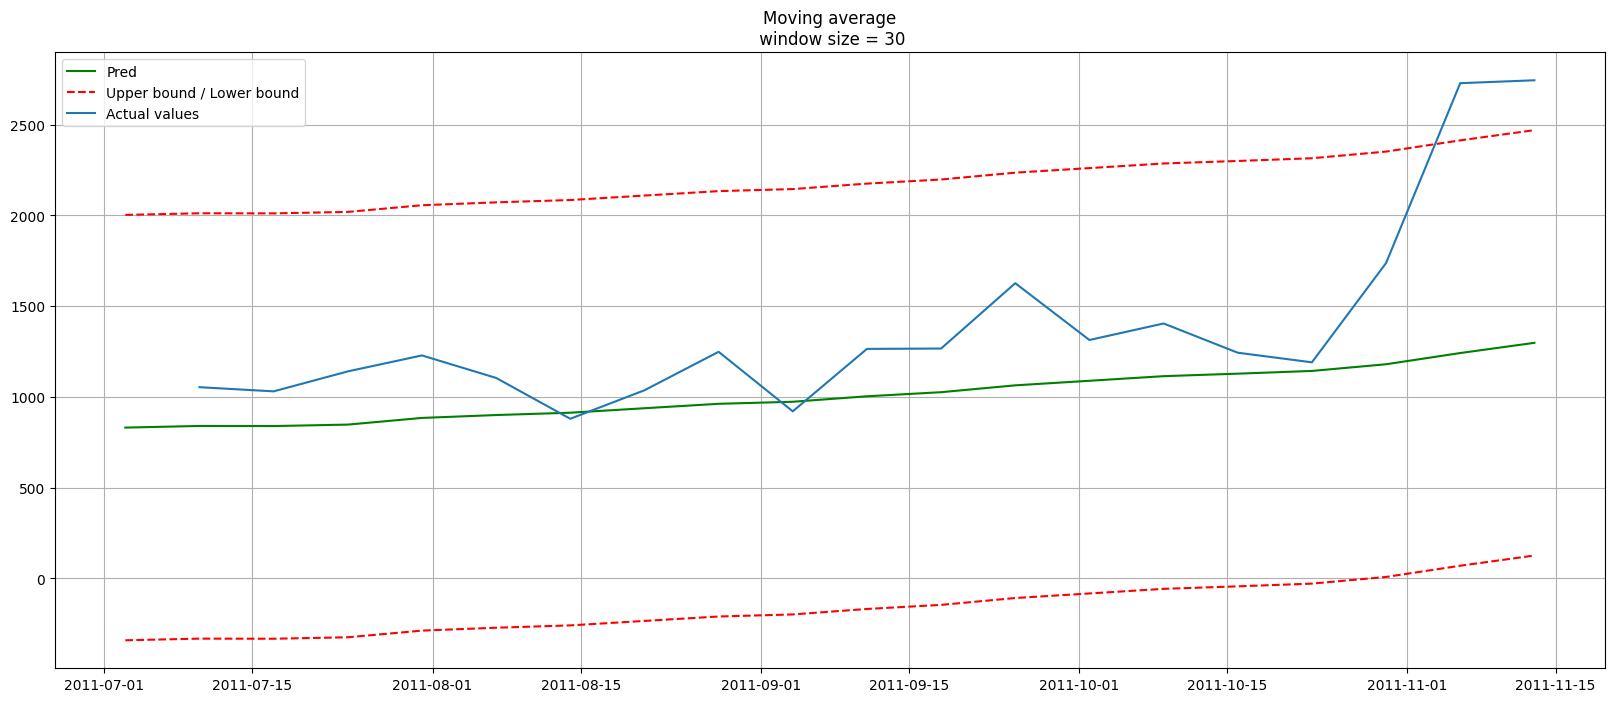

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Pred')

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

plot_moving_average(ds.quantity, 30, plot_intervals=True)

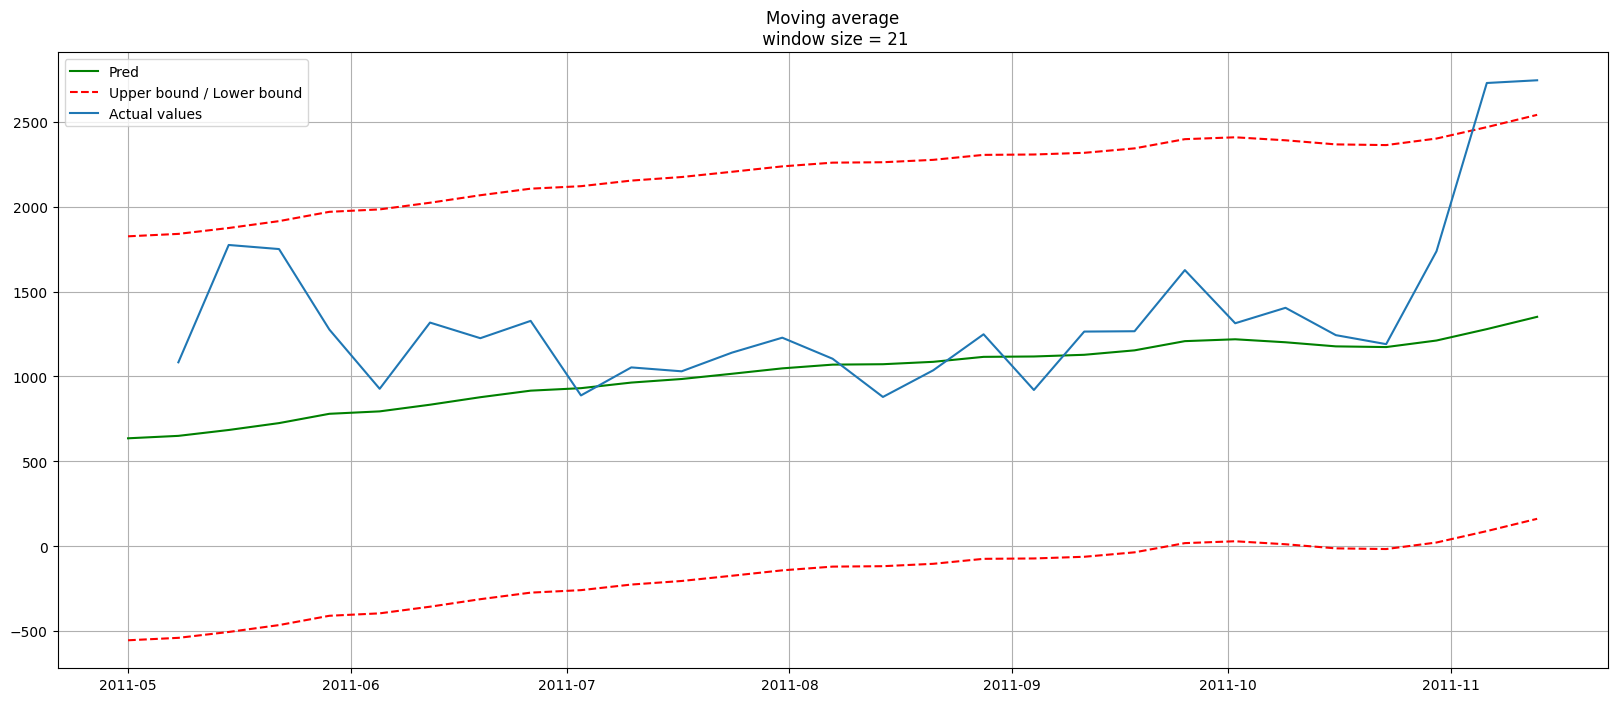

In [ ]:
plot_moving_average(ds.quantity, 21, plot_intervals=True)

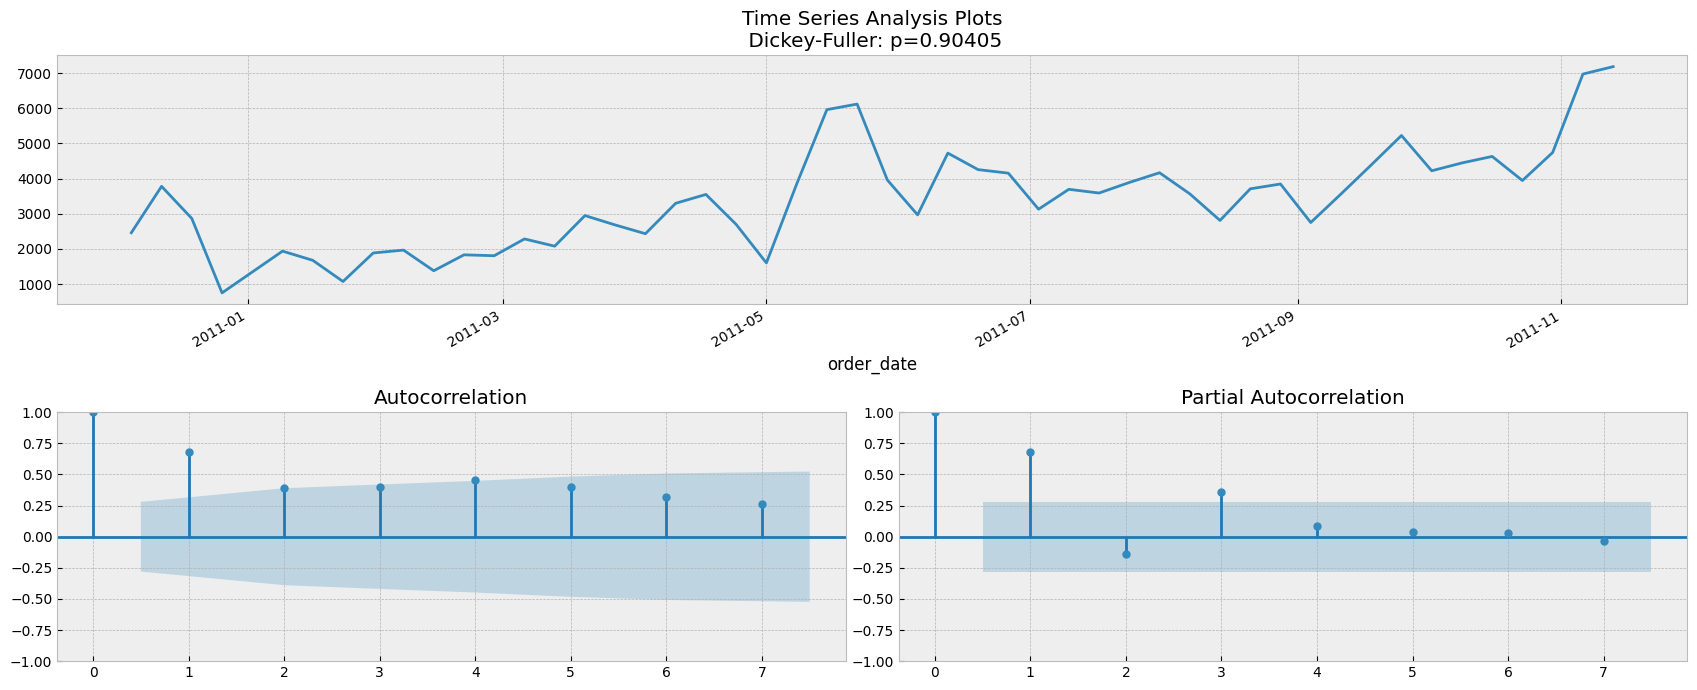

In [ ]:
def tsplot(y, lags=None, figsize=(17, 7), syle='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

tsplot(ds.gmv, lags=7)

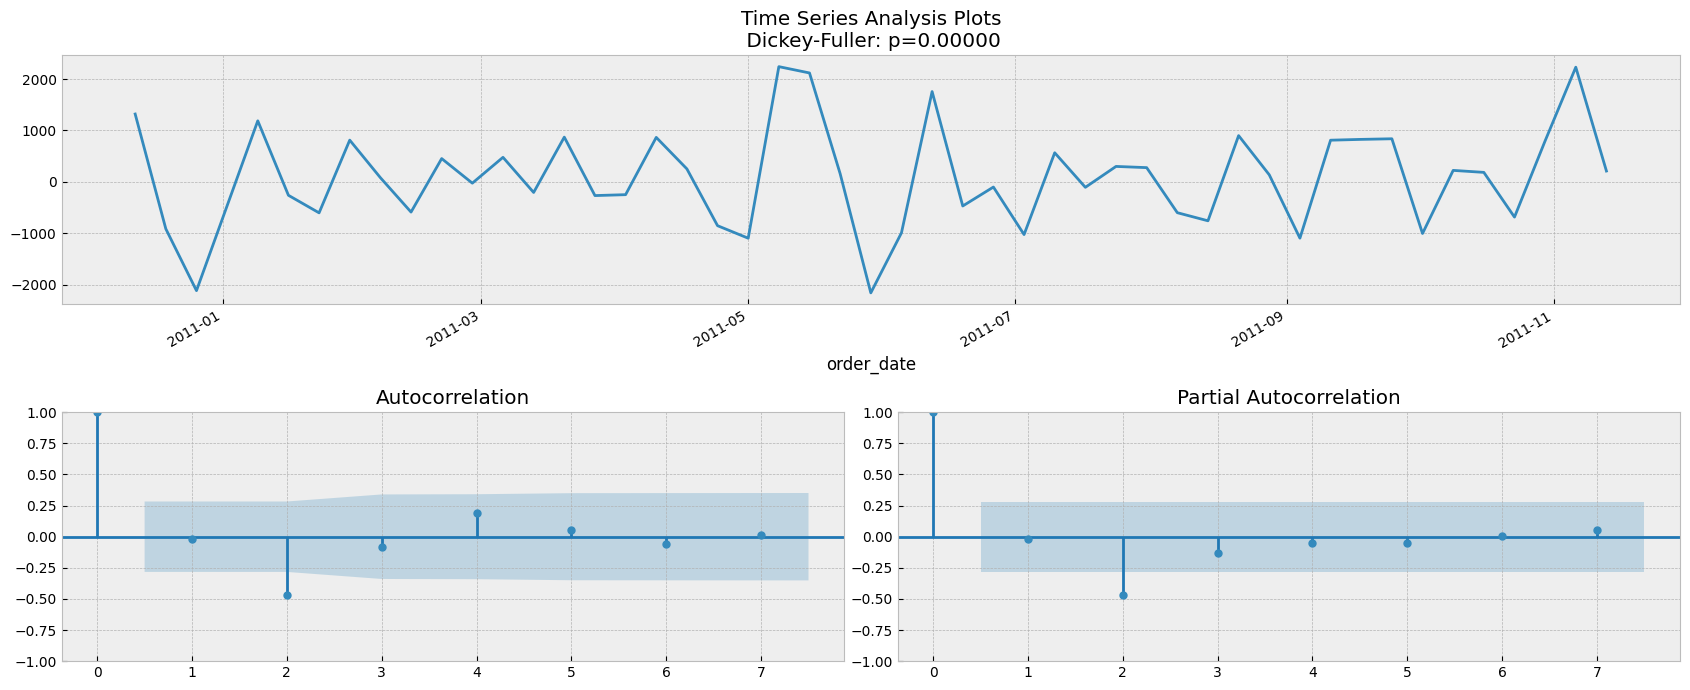

In [ ]:
# Take the first difference to remove to make the process stationary
ds_diff = ds.gmv - ds.gmv.shift(1)

tsplot(ds_diff[1:], lags=7)

In [ ]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s1 = 7
s2 = 14
s3 = 21

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

def optimize_SARIMA(parameters_list, d, D, s):

    results = []
    best_aic = float('inf')

    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(ds.quantity, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic

        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table

In [ ]:
result_table = optimize_SARIMA(parameters_list, d, D, s1)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(ds.quantity,
                                       order=(p, d, q),
                                       seasonal_order=(P, D, Q, s1)).fit(disp=-1)

print(best_model.summary())

<ipython-input-56-9d2001fcd51c>:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            quantity   No. Observations:                   49
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 7)   Log Likelihood                -296.856
Date:                             Fri, 27 Oct 2023   AIC                            603.712
Time:                                     08:26:54   BIC                            612.280
Sample:                                          0   HQIC                           606.832
                                              - 49                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1723      0.166     -1.038      0.299      -0.497       0.153
ar.L2         -0.3297      

In [ ]:
result_table = optimize_SARIMA(parameters_list, d, D, s2)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(ds.quantity,
                                       order=(p, d, q),
                                       seasonal_order=(P, D, Q, s2)).fit(disp=-1)

print(best_model.summary())

<ipython-input-56-9d2001fcd51c>:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                             quantity   No. Observations:                   49
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 14)   Log Likelihood                -252.885
Date:                              Fri, 27 Oct 2023   AIC                            509.771
Time:                                      09:14:09   BIC                            512.823
Sample:                                           0   HQIC                           510.812
                                               - 49                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L14      -0.6249      0.423     -1.476      0.140      -1.455       0.205
sigma2      1.472e+

In [ ]:
result_table = optimize_SARIMA(parameters_list, d, D, s3)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(ds.quantity, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s3)).fit(disp=-1)

print(best_model.summary())

<ipython-input-56-9d2001fcd51c>:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/625 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
 

                                         SARIMAX Results                                          
Dep. Variable:                                   quantity   No. Observations:                   49
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2, 3], 21)   Log Likelihood                   0.000
Date:                                    Fri, 27 Oct 2023   AIC                             12.000
Time:                                            11:03:26   BIC                             19.775
Sample:                                                 0   HQIC                            14.312
                                                     - 49                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L21   -2.756e-08    3.2e-07     -0.086      0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [ ]:
result_table

,parameters,aic
0,"(0, 0, 2, 3)",12.000000
1,"(2, 2, 3, 1)",18.000000
2,"(0, 0, 4, 4)",18.000000
3,"(2, 2, 4, 1)",20.000000
4,"(1, 3, 0, 0)",403.513008
5,"(0, 4, 0, 0)",403.797357
6,"(1, 3, 0, 1)",405.429442
7,"(1, 3, 1, 0)",405.444120
8,"(2, 3, 0, 0)",405.516883
9,"(0, 4, 0, 1)",405.697829


from matplotlib import pyplot as plt
result_table['aic'].plot(kind='hist', bins=20, title='aic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['aic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'aic'}, axis=1)
              .sort_values('aic', ascending=True))
  xs = counted['aic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_table.sort_values('aic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('aic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
result_table['aic'].plot(kind='line', figsize=(8, 4), title='aic')
plt.gca().spines[['top', 'right']].set_visible(False)

ERROR:root:Did not find quickchart key chart-2ea27fed-c2de-4eaa-bc74-384644acb6f6 in chart cache
ERROR:root:Did not find quickchart key chart-2274c483-cdc3-4ca7-a29a-6b589ed6a08a in chart cache
ERROR:root:Did not find quickchart key chart-fd9bbde6-3ed1-420c-a8f8-9473363ccfd3 in chart cache
